In [197]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1qgRXM0ZiX5_L0V-e1cr_clc2uHDFVcyz' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1qgRXM0ZiX5_L0V-e1cr_clc2uHDFVcyz" -O starter_code.zip && rm -rf /tmp/cookies.txt

--2021-11-29 18:35:32--  https://docs.google.com/uc?export=download&confirm=&id=1qgRXM0ZiX5_L0V-e1cr_clc2uHDFVcyz
Resolving docs.google.com (docs.google.com)... 173.194.218.100, 173.194.218.101, 173.194.218.102, ...
Connecting to docs.google.com (docs.google.com)|173.194.218.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-74-docs.googleusercontent.com/docs/securesc/bugvjvkoq1tg73lftd3g0qfp33qnegm8/n61124m07ft387pl1jve1860jkph51eh/1638210900000/08196725501150479867/17432634495261139668Z/1qgRXM0ZiX5_L0V-e1cr_clc2uHDFVcyz?e=download [following]
--2021-11-29 18:35:40--  https://doc-10-74-docs.googleusercontent.com/docs/securesc/bugvjvkoq1tg73lftd3g0qfp33qnegm8/n61124m07ft387pl1jve1860jkph51eh/1638210900000/08196725501150479867/17432634495261139668Z/1qgRXM0ZiX5_L0V-e1cr_clc2uHDFVcyz?e=download
Resolving doc-10-74-docs.googleusercontent.com (doc-10-74-docs.googleusercontent.com)... 173.194.218.132, 2607:f8b0:400c:c14::84
Connectin

In [198]:
!unzip -o starter_code

Archive:  starter_code.zip
2f4309617046ecaf0bd5d1862c42ed370a17f46c
  inflating: reid-col780-master/README.md  
  inflating: reid-col780-master/data/train/001/01_1.png  
  inflating: reid-col780-master/data/train/001/01_2.png  
  inflating: reid-col780-master/data/train/001/01_3.png  
  inflating: reid-col780-master/data/train/001/01_4.png  
  inflating: reid-col780-master/data/train/001/01_5.png  
  inflating: reid-col780-master/data/train/001/01_6.png  
  inflating: reid-col780-master/data/train/001/01_7.png  
  inflating: reid-col780-master/data/train/001/01_8.png  
  inflating: reid-col780-master/data/train/001/02_1.png  
  inflating: reid-col780-master/data/train/001/02_2.png  
  inflating: reid-col780-master/data/train/001/02_3.png  
  inflating: reid-col780-master/data/train/001/02_4.png  
  inflating: reid-col780-master/data/train/001/02_5.png  
  inflating: reid-col780-master/data/train/001/02_6.png  
  inflating: reid-col780-master/data/train/001/02_7.png  
  inflating: reid-

In [199]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import pandas as pd
from torchvision.io import read_image

In [200]:
import os
import sys
starter_path = os.path.abspath(os.getcwd())+'/reid-col780-master'
sys.path.insert(0, starter_path)

In [201]:
from utils import get_id

(128, 48, 3)


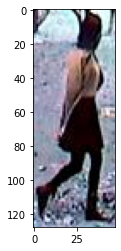

In [202]:
import cv2
imgSample = cv2.imread(starter_path+'/data/train/001/01_1.png')
plt.imshow(imgSample)
imgDim = imgSample.shape
print(imgDim)

### Load Dataset

In [203]:
def getCameraID(fileName):
  id = int(fileName.split('_')[0])
  return id

In [204]:
trainImages = os.listdir(starter_path+'/data/train')
numClasses = len(trainImages)
trainImages = [[label, getCameraID(y), trainImages[label]+'/'+y] for label in range(len(trainImages)) for y in os.listdir(starter_path+'/data/train/'+trainImages[label]) ]
trainImagesCam1 = []
trainImagesCam2 = []
for i in range(len(trainImages)):
  img_path = os.path.join(starter_path+'/data/train', trainImages[i][2])
  image = read_image(img_path)
  if trainImages[i][1]==1:
    trainImagesCam1.append([i, image])
  else:
    trainImagesCam2.append([i, image])
print(trainImages)
print(len(trainImages))

[[0, 2, '051/02_3.png'], [0, 2, '051/02_6.png'], [0, 1, '051/01_5.png'], [0, 1, '051/01_4.png'], [0, 1, '051/01_2.png'], [0, 2, '051/02_2.png'], [0, 2, '051/02_8.png'], [0, 2, '051/02_5.png'], [0, 1, '051/01_6.png'], [0, 1, '051/01_8.png'], [0, 2, '051/02_7.png'], [0, 1, '051/01_7.png'], [0, 1, '051/01_1.png'], [0, 2, '051/02_4.png'], [0, 1, '051/01_3.png'], [0, 2, '051/02_1.png'], [1, 2, '029/02_3.png'], [1, 2, '029/02_6.png'], [1, 1, '029/01_5.png'], [1, 1, '029/01_4.png'], [1, 1, '029/01_2.png'], [1, 2, '029/02_2.png'], [1, 2, '029/02_8.png'], [1, 2, '029/02_5.png'], [1, 1, '029/01_6.png'], [1, 1, '029/01_8.png'], [1, 2, '029/02_7.png'], [1, 1, '029/01_7.png'], [1, 1, '029/01_1.png'], [1, 2, '029/02_4.png'], [1, 1, '029/01_3.png'], [1, 2, '029/02_1.png'], [2, 2, '028/02_3.png'], [2, 2, '028/02_6.png'], [2, 1, '028/01_5.png'], [2, 1, '028/01_4.png'], [2, 1, '028/01_2.png'], [2, 2, '028/02_2.png'], [2, 2, '028/02_8.png'], [2, 2, '028/02_5.png'], [2, 1, '028/01_6.png'], [2, 1, '028/01_

In [205]:
transform_train_list = [
        transforms.ToPILImage(),
        transforms.Resize((128,48)),
        transforms.ToTensor(),
    ]
transform_train = transforms.Compose(transform_train_list)
target_transform = transforms.Lambda(lambda y: torch.zeros(numClasses, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

### Normalization

In [206]:
imgsCam1 = torch.stack([transform_train(x[1]) for x in trainImagesCam1], dim=3)
imgsCam2 = torch.stack([transform_train(x[1]) for x in trainImagesCam2], dim=3)
meanCam1 = imgsCam1.view(3, -1).mean(dim=1)
meanCam2 = imgsCam2.view(3, -1).mean(dim=1)
stdCam1 = imgsCam1.view(3, -1).std(dim=1)
stdCam2 = imgsCam2.view(3, -1).std(dim=1)

In [207]:
tranformNormCam1 = transforms.Normalize(meanCam1, stdCam1)
tranformNormCam2 = transforms.Normalize(meanCam2, stdCam2)
trainImagesCam1 = [[x[0], tranformNormCam1(transform_train(x[1]))] for x in trainImagesCam1]
trainImagesCam2 = [[x[0], tranformNormCam2(transform_train(x[1]))] for x in trainImagesCam2]
for x in trainImagesCam1:
  trainImages[x[0]][2] = x[1]
for x in trainImagesCam2:
  trainImages[x[0]][2] = x[1]

### Custom Dataset

In [208]:
class CustomDataset(Dataset):
  def __init__(self, images, transform=None, target_transform=None):
        self.images = images
        self.transform = transform
        self.target_transform = target_transform

  def __len__(self):
        return len(self.images)

  def __getitem__(self, idx):
        label = self.images[idx][0]
        image = self.images[idx][2]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [209]:
dataset = CustomDataset(trainImages, target_transform=target_transform)


### Model

In [210]:
from torch.nn import Conv2d,Linear, Module, Sequential,BatchNorm2d,MaxPool2d
import torch.nn.functional as F
import torchvision.models as models
from torchsummary import summary

In [211]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [212]:
class ResidualBlock(Module):
  def __init__(self,in_channels,increase_dims=False,is_first=False):
        super(ResidualBlock, self).__init__()
        self.increase_dims = increase_dims
        self.is_first = is_first
        self.bn_0 = None
        self.conv_up = None
        out_channels = in_channels
        stride = 1
        if increase_dims:
          out_channels*=2
          stride*=2
          # self.conv_up = nn.Conv2d(in_channels=in_channels,out_channels=out_channels,kernel_size=1,stride=2,padding="same")
          self.conv_up = nn.Conv2d(in_channels=in_channels,out_channels=out_channels,kernel_size=1,stride=2)
        if not is_first:
          self.bn_0 = nn.Sequential(
              nn.BatchNorm2d(in_channels),
              nn.ELU()
          )
        if increase_dims:
          self.conv_1 = nn.Sequential(
              # nn.Conv2d(in_channels=in_channels,out_channels=out_channels,kernel_size=3,stride=stride,padding="same"),
              nn.Conv2d(in_channels=in_channels,out_channels=out_channels,kernel_size=3,stride=stride),
              nn.BatchNorm2d(out_channels),
              nn.ELU(),
              nn.Dropout(p=0.4)
          )
        else:
          self.conv_1 = nn.Sequential(
              nn.Conv2d(in_channels=in_channels,out_channels=out_channels,kernel_size=3,stride=stride,padding="same"),
              # nn.Conv2d(in_channels=in_channels,out_channels=out_channels,kernel_size=3,stride=stride),
              nn.BatchNorm2d(out_channels),
              nn.ELU(),
              nn.Dropout(p=0.4)
          )
        self.conv_2 = nn.Conv2d(in_channels=out_channels,out_channels=out_channels,kernel_size=3,stride=1,padding="same")
  def forward(self,x):
      if self.bn_0:
        y = self.bn_0(x)
      else:
        y = x
      residual = x
      if self.increase_dims:
        y = F.pad(y, (0, 1, 0, 1))
      out = self.conv_1(y)
      out = self.conv_2(out)
      if self.conv_up:
        residual = self.conv_up(residual)
      return out+residual

In [213]:
class ReidModel1(Module):   
    def __init__(self, numClasses = 2, inference = False):
        super(ReidModel1, self).__init__()
        self.inference = inference
        self.numClasses = numClasses
        self.conv_1 = nn.Sequential(
          nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3,stride=1,padding="same"),
          nn.BatchNorm2d(32),
          nn.ELU()
        )
        self.conv_2 = nn.Sequential(
          nn.Conv2d(in_channels=32,out_channels=32,kernel_size=3,stride=1,padding="same"),
          nn.BatchNorm2d(32),
          nn.ELU()
        )
        # self.pool_3 = nn.MaxPool2d(kernel_size=3,stride=2,padding="same")
        self.pool_3 = nn.MaxPool2d(kernel_size=3,stride=2)
        
        self.residual_4 = ResidualBlock(in_channels=32,is_first=True)
        self.residual_5 = ResidualBlock(in_channels=32)
        self.residual_6 = ResidualBlock(in_channels=32,increase_dims=True)
        self.residual_7 = ResidualBlock(in_channels=64)
        self.residual_8 = ResidualBlock(in_channels=64,increase_dims=True)
        self.residual_9 = ResidualBlock(in_channels=128)

        self.dense_10 = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(p=0.4),
            nn.Linear(in_features=128*16*6,out_features=128),
            nn.BatchNorm1d(128),
            nn.ELU()
        )
        
        self.cosine_layer = nn.utils.weight_norm(nn.Linear(in_features=128,out_features=numClasses,bias=False))

    # Defining the forward pass    
    def forward(self, x):
        out = self.conv_1(x)
        out = self.conv_2(out)
        out = F.pad(out, (0, 1, 0, 1))
        out = self.pool_3(out)
        out = self.residual_4(out)
        out = self.residual_5(out)
        out = self.residual_6(out)
        out = self.residual_7(out)
        out = self.residual_8(out)
        out = self.residual_9(out)
        out = self.dense_10(out)
        out = nn.functional.normalize(out,p=2,dim=1)
        if (not self.inference):
          out = self.cosine_layer(out)
        # out = self.cosine_layer(out)
        return out

In [214]:
base_model = models.resnet50(pretrained = True, progress= False)
base_model = torch.nn.Sequential(*(list(base_model.children())[:-1]))
base_model.to(device)
summary(base_model, (3, 128, 48))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 24]           9,408
       BatchNorm2d-2           [-1, 64, 64, 24]             128
              ReLU-3           [-1, 64, 64, 24]               0
         MaxPool2d-4           [-1, 64, 32, 12]               0
            Conv2d-5           [-1, 64, 32, 12]           4,096
       BatchNorm2d-6           [-1, 64, 32, 12]             128
              ReLU-7           [-1, 64, 32, 12]               0
            Conv2d-8           [-1, 64, 32, 12]          36,864
       BatchNorm2d-9           [-1, 64, 32, 12]             128
             ReLU-10           [-1, 64, 32, 12]               0
           Conv2d-11          [-1, 256, 32, 12]          16,384
      BatchNorm2d-12          [-1, 256, 32, 12]             512
           Conv2d-13          [-1, 256, 32, 12]          16,384
      BatchNorm2d-14          [-1, 256,

In [215]:
class ReidModelResnet50(Module):
  def __init__(self, numClasses = 2, inference = False):
    super(ReidModelResnet50, self).__init__()
    self.inference = inference
    self.numClasses = numClasses
    # load pretrained resnet50
    base_model = models.resnet50(pretrained = True, progress= False)
    base_model = torch.nn.Sequential(*(list(base_model.children())[:-1]))
    # freeze weights
    num_layers = len(list(base_model.children()))
    ct = 0
    for child in base_model.children():
      ct += 1
      if ct < (num_layers-1):
          for param in child.parameters():
              param.requires_grad = False
    self.base_model = base_model
    self.final_layer = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(p=0.4),
            nn.Linear(in_features=2048,out_features=128),
            nn.BatchNorm1d(128),
            nn.ELU()
        )
    self.cosine_layer = nn.utils.weight_norm(nn.Linear(in_features=128,out_features=numClasses,bias=False))
  def forward(self, x):
    out = self.base_model(x)
    # out = torch.squeeze(out, dim = 3)
    # out = torch.squeeze(out, dim = 2)
    out = self.final_layer(out)
    out = nn.functional.normalize(out,p=2,dim=1)
    if (not self.inference):
      out = self.cosine_layer(out)
    return out



In [216]:
model = ReidModelResnet50()
model.to(device)
summary(model, (3, 128, 48))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 24]           9,408
       BatchNorm2d-2           [-1, 64, 64, 24]             128
              ReLU-3           [-1, 64, 64, 24]               0
         MaxPool2d-4           [-1, 64, 32, 12]               0
            Conv2d-5           [-1, 64, 32, 12]           4,096
       BatchNorm2d-6           [-1, 64, 32, 12]             128
              ReLU-7           [-1, 64, 32, 12]               0
            Conv2d-8           [-1, 64, 32, 12]          36,864
       BatchNorm2d-9           [-1, 64, 32, 12]             128
             ReLU-10           [-1, 64, 32, 12]               0
           Conv2d-11          [-1, 256, 32, 12]          16,384
      BatchNorm2d-12          [-1, 256, 32, 12]             512
           Conv2d-13          [-1, 256, 32, 12]          16,384
      BatchNorm2d-14          [-1, 256,

### Training

In [217]:
from torch.utils.data import DataLoader, ConcatDataset
from torch.optim import Adam
from sklearn.model_selection import KFold

In [238]:
k_folds = 5
num_epochs = 200
batch_size = 16
torch.manual_seed(42)

In [219]:
def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
    if hasattr(layer, 'reset_parameters'):
      # print(f'Reset trainable parameters of layer = {layer}')
      layer.reset_parameters()

Use GPU if available

In [220]:
def reset_net():
  global net
  net = ReidModel1(numClasses = 62, inference = False)
  net.to(device)
reset_net()

In [221]:
def train_epoch(trainDataset,criterion,optimizer):

    num_minibatches = len(trainDataset)//batch_size
    running_loss = 0.0
    for i, data in enumerate(trainDataset, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        # if i % (num_minibatches//5) == (num_minibatches//5-1):    # print every 100 mini-batches
        #     print('[%d, %5d] loss: %.3f' %
        #           (epoch + 1, i + 1, running_loss / (num_minibatches//5)))
        #     running_loss = 0.0
    return running_loss

#### Test Set

In [222]:
def test(testDataset,criterion):
    correct = 0
    loss = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testDataset:
            images, labels = data[0].to(device), data[1].to(device)
            # calculate outputs by running images through the network
            y_pred = net(images)

            # cross entropy loss
            loss += criterion(y_pred,labels).item()

            # get labels
            y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(y_pred_softmax, dim = 1) 
            _, labels = torch.max(labels, dim = 1) 

            # get accuracy
            correct += (predicted == labels).sum().item()

            # total items
            total += labels.size(0)

    return loss,100 * correct / total

#### KFold

In [223]:
from sklearn.model_selection import KFold

In [134]:
kfold = KFold(n_splits=k_folds,shuffle=True,random_state=42)

In [226]:
results = {}
# K-fold Cross Validation model evaluation
for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):
  
  # Print
  print(f'FOLD {fold}')
  print('--------------------------------')
  
  # Sample elements randomly from a given list of ids, no replacement.
  train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
  test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
  
  # Define data loaders for training and testing data in this fold
  trainloader = torch.utils.data.DataLoader(
                    dataset, 
                    batch_size=batch_size, sampler=train_subsampler)
  testloader = torch.utils.data.DataLoader(
                    dataset,
                    batch_size=batch_size, sampler=test_subsampler)
  
  # reset
  reset_net()
  criterion = nn.CrossEntropyLoss()
  optimizer = Adam(net.parameters())
  # train
  for epoch in range(num_epochs):
    loss = train_epoch(trainloader,criterion,optimizer)
    val_loss,val_acc = test(testloader,criterion)
    print(f'Epoch\t{epoch+1}\tloss:{loss:.4f}\tval_loss:{val_loss:.4f}\tval_acc:{val_acc:.4f}')
  # test
  results[fold] = test(testloader,criterion)[1]
  print('--------------------------------')

print('--------------------------------')
sum = 0.0
for key, value in results.items():
  print(f'Fold {key}: {value} %')
  sum += value
print(f'Average: {sum/len(results.keys())} %')

FOLD 0
--------------------------------
Epoch	1	loss:200.4371	val_loss:51.1931	val_acc:35.6784
Epoch	2	loss:191.2545	val_loss:49.7381	val_acc:50.2513
Epoch	3	loss:185.8997	val_loss:48.8883	val_acc:58.7940
Epoch	4	loss:182.4201	val_loss:48.1127	val_acc:66.3317
Epoch	5	loss:179.6453	val_loss:47.5720	val_acc:66.8342
Epoch	6	loss:177.6343	val_loss:47.1196	val_acc:67.8392
Epoch	7	loss:175.7819	val_loss:46.6306	val_acc:73.8693
Epoch	8	loss:174.3770	val_loss:46.4068	val_acc:72.3618
Epoch	9	loss:172.8434	val_loss:46.2313	val_acc:73.3668
Epoch	10	loss:172.0626	val_loss:45.8350	val_acc:74.3719
Epoch	11	loss:170.3403	val_loss:45.5539	val_acc:74.8744
Epoch	12	loss:169.0253	val_loss:45.3911	val_acc:72.8643
Epoch	13	loss:167.9299	val_loss:45.1245	val_acc:77.3869
Epoch	14	loss:167.0179	val_loss:45.1373	val_acc:71.8593
Epoch	15	loss:165.7286	val_loss:44.7386	val_acc:76.8844
Epoch	16	loss:164.5903	val_loss:44.5874	val_acc:80.4020
Epoch	17	loss:163.6358	val_loss:44.5098	val_acc:72.3618
Epoch	18	loss:162

KeyboardInterrupt: ignored

Final Training on complete dataset

In [239]:
datasetLoader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle = True)
reset_net()
criterion = nn.CrossEntropyLoss()
optimizer = Adam(net.parameters(), lr=0.001)
for epoch in range(num_epochs):
  loss = train_epoch(datasetLoader,criterion,optimizer)
  print(f'Epoch\t{epoch+1}\tloss:{loss:.4f}')

Epoch	1	loss:247.2648
Epoch	2	loss:235.3156
Epoch	3	loss:228.5250
Epoch	4	loss:223.6824
Epoch	5	loss:220.3557
Epoch	6	loss:217.9892
Epoch	7	loss:215.6699
Epoch	8	loss:213.9618
Epoch	9	loss:211.9828
Epoch	10	loss:210.5367
Epoch	11	loss:208.5740
Epoch	12	loss:207.0578
Epoch	13	loss:205.0313
Epoch	14	loss:203.8956
Epoch	15	loss:202.5827
Epoch	16	loss:200.4906
Epoch	17	loss:199.1673
Epoch	18	loss:197.7532
Epoch	19	loss:196.1889
Epoch	20	loss:194.7737
Epoch	21	loss:192.8270
Epoch	22	loss:191.3840
Epoch	23	loss:189.7968
Epoch	24	loss:188.3414
Epoch	25	loss:187.0779
Epoch	26	loss:185.4001
Epoch	27	loss:183.9859
Epoch	28	loss:182.7346
Epoch	29	loss:181.2585
Epoch	30	loss:179.9532
Epoch	31	loss:178.1110
Epoch	32	loss:177.0186
Epoch	33	loss:175.3506
Epoch	34	loss:173.9112
Epoch	35	loss:172.4497
Epoch	36	loss:170.7974
Epoch	37	loss:169.3408
Epoch	38	loss:168.2335
Epoch	39	loss:166.9082
Epoch	40	loss:165.2790
Epoch	41	loss:163.8974
Epoch	42	loss:162.6295
Epoch	43	loss:160.7169
Epoch	44	loss:159.29

In [240]:
PATH = './final_model.pth'
torch.save(net.state_dict(), PATH)

### Evaluation

In [59]:
!apt install libomp-dev
!pip install faiss
!pip install faiss-gpu

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libomp5
Suggested packages:
  libomp-doc
The following NEW packages will be installed:
  libomp-dev libomp5
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 239 kB of archives.
After this operation, 804 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libomp5 amd64 5.0.1-1 [234 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libomp-dev amd64 5.0.1-1 [5,088 B]
Fetched 239 kB in 1s (361 kB/s)
Selecting previously unselected package libomp5:amd64.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../libomp5_5.0.1-1_amd64.deb ...
Unpacking libomp5:amd64 (5.0.1-1) ...
Selecting previously unselected package libomp-dev.
Preparing to unpack .../libomp-dev_5.0.1-1_amd64.deb ...
Unpacking libomp-dev (5.0.1-

In [241]:
# Evaluation 
# Acknowledgement: the code is based on Siddhant Kapil's repo on LA-Transformer

from __future__ import print_function

import os, sys
import faiss
import numpy as np

from PIL import Image
from tqdm.notebook import tqdm

import torch
import torch.nn as nn
from torch.nn import init
import torch.optim as optim
from torchvision import models
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset

from utils import get_id
from metrics import rank1, rank5, calc_ap



# ### Set feature volume sizes (height, width, depth) 
# TODO: update with your model's feature length

batch_size = 1
H, W, D = 1, 1, 128 # for dummymodel we have feature volume 7x7x2048

# ### Load Model

# TODO: Uncomment the following lines to load the Implemented and trained Model

save_path = "final_model.pth"
model = ReidModel1(numClasses = numClasses, inference=True)
model.load_state_dict(torch.load(save_path), strict=False)
model.eval()

# TODO: Comment out the dummy model
# model = DummyModel(batch_size, H, W, D)

# ### Data Loader for query and gallery

# TODO: For demo, we have resized to 224x224 during data augmentation
# You are free to use augmentations of your own choice
transform = [transforms.Resize((128,48)),
        transforms.ToTensor()]
transformCam1 = [
        transforms.Normalize(meanCam1, stdCam1)
    ]
transformCam2 = [
        transforms.Normalize(meanCam2, stdCam2)
    ]

data_transforms = {
        'basic': transforms.Compose( transform ),
        'Cam1': transforms.Compose( transformCam1 ),
        'Cam2': transforms.Compose(transformCam2)
    }


image_datasets = {}
data_dir = starter_path+"/data/val"

image_datasets['query'] = datasets.ImageFolder(os.path.join(data_dir, 'query'), data_transforms['basic'])
image_datasets['gallery'] = datasets.ImageFolder(os.path.join(data_dir, 'gallery'), data_transforms['basic'])
query_loader = DataLoader(dataset = image_datasets['query'], batch_size=batch_size, shuffle=False )
gallery_loader = DataLoader(dataset = image_datasets['gallery'], batch_size=batch_size, shuffle=False)

class_names = image_datasets['query'].classes


# ###  Extract Features
def extract_feature_alt(dataset):
  features =  torch.FloatTensor()
  cam_labels, _ = get_id(dataset.imgs)
  for i in tqdm(range(len(dataset))):
    if (cam_labels[i]=='1'):
      img = data_transforms['Cam1'](dataset[i][0])
    else:
      img = data_transforms['Cam2'](dataset[i][0])
    img = img[None, :]
    output = model(img)
    output = output[None, None, :]
    features = torch.cat((features, output.detach().cpu()), 0)
  return features

def extract_feature(dataloaders):
    
    features =  torch.FloatTensor()
    count = 0
    idx = 0
    for data in tqdm(dataloaders):
        img, label = data
        # print(label)
        # Uncomment if using GPU for inference
        #img, label = img.cuda(), label.cuda()

        output = model(img) # (B, D, H, W) --> B: batch size, HxWxD: feature volume size
        n, c, h, w = img.size()
        
        count += n
        features = torch.cat((features, output.detach().cpu()), 0)
        idx += 1
    return features

# Extract Query Features

query_feature= extract_feature_alt(image_datasets['query'])

# Extract Gallery Features

gallery_feature = extract_feature_alt(image_datasets['gallery'])

# Retrieve labels

gallery_path = image_datasets['gallery'].imgs
query_path = image_datasets['query'].imgs

gallery_cam,gallery_label = get_id(gallery_path)
query_cam,query_label = get_id(query_path)


# ## Concat Averaged GELTs
concatenated_query_vectors = []
for query in tqdm(query_feature):
    fnorm = torch.norm(query, p=2, dim=0, keepdim=True)#*np.sqrt(H*W)
    query_norm = query.div(fnorm.expand_as(query))
    concatenated_query_vectors.append(query_norm.view((-1)))

concatenated_gallery_vectors = []
for gallery in tqdm(gallery_feature):
    fnorm = torch.norm(gallery, p=2, dim=0, keepdim=True)#*np.sqrt(H*W)
    gallery_norm = gallery.div(fnorm.expand_as(gallery))
    concatenated_gallery_vectors.append(gallery_norm.view((-1)))
  

# ## Calculate Similarity using FAISS

index = faiss.IndexIDMap(faiss.IndexFlatIP(H*W*D))

index.add_with_ids(np.array([t.numpy() for t in concatenated_gallery_vectors]),np.array(gallery_label))

def search(query: str, k=1):
    encoded_query = query.unsqueeze(dim=0).numpy()
    top_k = index.search(encoded_query, k)
    return top_k


# ### Evaluate 

rank1_score = 0
rank5_score = 0
ap = 0
count = 0
for query, label in zip(concatenated_query_vectors, query_label):
    count += 1
    label = label
    output = search(query, k=10)
    rank1_score += rank1(label, output) 
    rank5_score += rank5(label, output) 
    print("Correct: {}, Total: {}, Incorrect: {}".format(rank1_score, count, count-rank1_score), end="\r")
    ap += calc_ap(label, output)

print("Rank1: %.3f, Rank5: %.3f, mAP: %.3f"%(rank1_score/len(query_feature), 
                                             rank5_score/len(query_feature), 
                                             ap/len(query_feature)))    

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/181 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/181 [00:00<?, ?it/s]

Rank1: 0.857, Rank5: 0.964, mAP: 0.792
